In [6]:
import utils
import math
import itertools
import matplotlib.pyplot as plt
from collections import namedtuple
import pandas as pd
import numpy as np

## Day 3: Toboggan Trajectory

[#](https://adventofcode.com/2020/day/3). We have open squares `.` and trees `#`, which repeat infinetly on the right.

We start at the top left and have to reach the bottom. We can move right 3, down 1 only. Following this trajectory, who many trees do we encounter?

In [114]:
test3 = """..##.......
#...#...#..
.#....#..#.
..#.#...#.#
.#...##..#.
..#.##.....
.#.#.#....#
.#........#
#.##...#...
#...##....#
.#..#...#.#""".splitlines()

inp3 = utils.get_input(3)

In [115]:
test3

['..##.......',
 '#...#...#..',
 '.#....#..#.',
 '..#.#...#.#',
 '.#...##..#.',
 '..#.##.....',
 '.#.#.#....#',
 '.#........#',
 '#.##...#...',
 '#...##....#',
 '.#..#...#.#']

In [116]:
grid = test3
X, Y = 3, 1 # moves by
x, y = 0, 0 # postion

positions = []

for i in range(len(grid)-1):
    x += X
    y += Y
    positions.append((x,y))


trees = 0
l = len(grid[0])

for x, y in positions:
    print(grid[y], x, y, (x % l-1))
    if grid[y][x % (l)] == "#":
        trees += 1
trees

#...#...#.. 3 1 2
.#....#..#. 6 2 5
..#.#...#.# 9 3 8
.#...##..#. 12 4 0
..#.##..... 15 5 3
.#.#.#....# 18 6 6
.#........# 21 7 9
#.##...#... 24 8 1
#...##....# 27 9 4
.#..#...#.# 30 10 7


7

In [117]:
grid = inp3
X, Y = 3, 1 # moves by
x, y = 0, 0 # postion

positions = []

for i in range(len(grid)-1):
    x += X
    y += Y
    positions.append((x,y))


trees = 0
l = len(grid[0])

for x, y in positions:
    if grid[y][x%l] == "#":
        trees += 1
trees

272

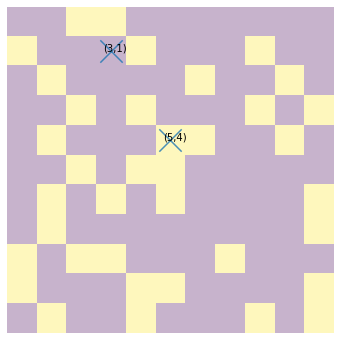

In [169]:
def plot_grid(grid=test3, positions=positions):
    binary_grid = [[c=="#" for c in row] for row in [row for row in grid]]
    fig = plt.figure(figsize=(6,6))
    plt.imshow(binary_grid, alpha=0.3)
    plt.axis('off')
    
    # plot asteroids
    yy, xx = zip(*positions)
    plt.scatter(xx, yy, marker="x", s=500, alpha=0.8)
    
    # highlight positions
    for x, y in zip(xx,yy):
        plt.annotate(f"({x},{y})", (x-0.25,y))
    
    plt.show()

plot_grid(positions=[(1,3), (4,5)])

## Part 2 

get slopes for

```
Right 1, down 1.
Right 3, down 1. (This is the slope you already checked.)
Right 5, down 1.
Right 7, down 1.
Right 1, down 2.
```

We need a general func to get the numb of trees given a slope

In [109]:
def get_trees(grid=test3, slope=(3,1), start_pos=(0,0)):
    """returns a number of trees encountered on a given slope/grid/start_pos"""
    x,y = start_pos
    X,Y = slope
    
    # get positions our tobaggan travels through
    positions = []
    for i in range(len(grid)-1):
        x += X
        y += Y
        if y <= len(grid):
            positions.append((x,y))
            
    # count trees
    trees = 0
    l = len(grid[0])
    for x, y in positions:
        if grid[y][x%l] == "#":
            trees += 1
            
    return trees

assert get_trees(test3) == 7
get_trees(inp3)

272

In [112]:
slopes = [(1, 1), (3,1), (5,1), (7,1), (1,2)]

num_trees = []

for slope in slopes:
    trees = get_trees(inp3, slope=slope)
    num_trees.append(trees)
    
math.prod(num_trees)

3898725600